# Arbitary Value Imputation

Put any arbitary number in place of all missing values.

#When to use

- Data is not missing at random / not MCAR (i.e. Data is missing in chunks)

#Advantages

- simple and easy

#Disadvantage

- change in variance

- Probability density changes

- corr and covariance changes

#Not use very much

# Using Pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('Datasets\\titanic_toy.csv')

In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
x_train,x_test,  y_train , y_test =  train_test_split(x , y, test_size = 0.2, random_state = 42)

In [11]:
x_train['99_age'] = x_train['Age'].fillna(99)
x_train['-1_age'] = x_train['Age'].fillna(-1)

x_train['99_fare'] = x_train['Fare'].fillna(99)
x_train['-1_fare'] = x_train['Fare'].fillna(-1)

In [13]:
x_train.sample(5)

,Age,Fare,Family,99_age,-1_age,99_fare,-1_fare
482,50.0,8.0500,0,50.0,50.0,8.0500,8.0500
32,NaN,7.7500,0,99.0,-1.0,7.7500,7.7500
125,12.0,11.2417,1,12.0,12.0,11.2417,11.2417
595,36.0,24.1500,2,36.0,36.0,24.1500,24.1500
680,NaN,8.1375,0,99.0,-1.0,8.1375,8.1375


In [15]:
print("Age")
print(f"Orignal_variance : {x_train['Age'].var()}, orignal_mean : {x_train['Age'].mean()}, orignal_medain: {x_train['Age'].median()}")
print(f"99_age_variance : {x_train['99_age'].var()}, mean_mean : {x_train['99_age'].mean()}, mean_medain: {x_train['99_age'].median()}")
print(f"1_age_variance : {x_train['-1_age'].var()}, orignal_mean : {x_train['-1_age'].mean()}, orignal_medain: {x_train['-1_age'].median()}")
print("")
print("Fare")
print(f"Orignal_variance : {x_train['Fare'].var()}, orignal_mean : {x_train['Fare'].mean()}, orignal_medain: {x_train['Fare'].median()}")
print(f"99_fare_variance : {x_train['99_fare'].var()}, mean_mean : {x_train['99_fare'].mean()}, mean_medain: {x_train['99_fare'].median()}")
print(f"1_fare_variance : {x_train['-1_fare'].var()}, orignal_mean : {x_train['-1_fare'].mean()}, orignal_medain: {x_train['-1_fare'].median()}")


Age
Orignal_variance : 210.2517072477435, orignal_mean : 29.498846153846156, orignal_medain: 28.0
99_age_variance : 932.9665366701432, mean_mean : 43.164803370786515, mean_medain: 32.0
1_age_variance : 315.9955036260055, orignal_mean : 23.50188202247191, orignal_medain: 24.0

Fare
Orignal_variance : 2761.0314349486343, orignal_mean : 32.51778772189349, orignal_medain: 14.4
99_fare_variance : 2833.708690936761, mean_mean : 35.87924789325842, mean_medain: 15.3729
1_fare_variance : 2675.2394049177024, orignal_mean : 30.823068117977527, orignal_medain: 13.0


<Axes: ylabel='Density'>

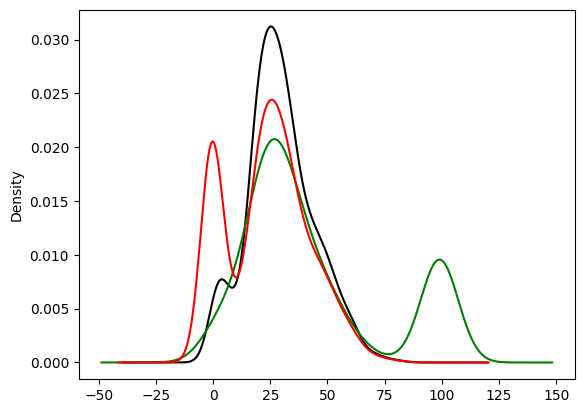

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
x_train['Age'].plot(kind = 'kde', ax=ax , color= 'black')

#variable imputed with median
x_train['99_age'].plot(kind = 'kde', ax = ax, color = 'green')

#variable imputed with mean
x_train['-1_age'].plot(kind = 'kde', ax = ax , color = 'red')

<Axes: ylabel='Density'>

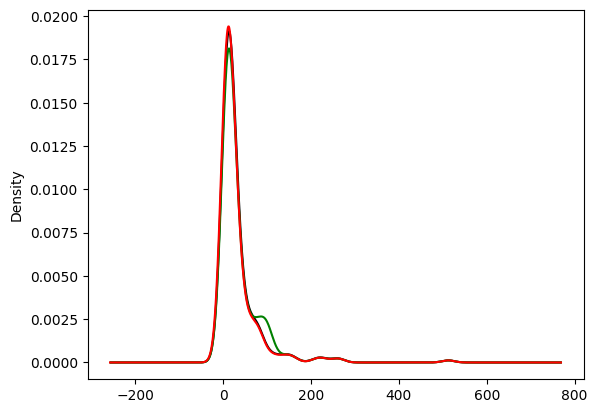

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
x_train['Fare'].plot(kind = 'kde', ax=ax , color= 'black')

#variable imputed with median
x_train['99_fare'].plot(kind = 'kde', ax = ax, color = 'green')

#variable imputed with mean
x_train['-1_fare'].plot(kind = 'kde', ax = ax , color = 'red')

<Axes: >

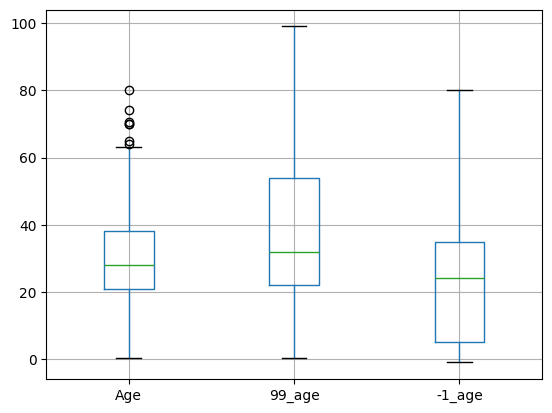

In [19]:
x_train[['Age', '99_age', '-1_age']].boxplot()

<Axes: >

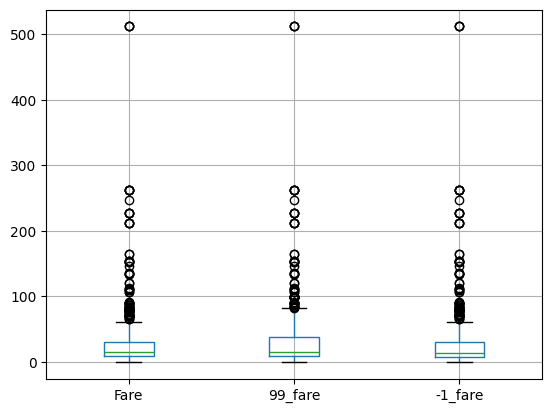

In [20]:
x_train[['Fare', '99_fare', '-1_fare']].boxplot()

# Using sklearn

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [22]:
imputer1 = SimpleImputer(strategy = 'constant', fill_value = 99 )
imputer2 = SimpleImputer(strategy='constant', fill_value = -1)

In [23]:
trf = ColumnTransformer([
        ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [24]:
trf.fit(x_train)

C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [25]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [26]:
trf.named_transformers_['imputer2'].statistics_

array([-1.])

In [27]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [28]:
x_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  -1.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])